In [105]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Step 1: Load your datasets
ny_weather = pd.read_csv('Datasets/NewYork.csv', index_col="date")
dubai_weather = pd.read_csv('Datasets/Dubai.csv', index_col="date")
melbourne_weather = pd.read_csv('Datasets/Melbourne.csv', index_col="date")
sydney_weather = pd.read_csv('Datasets/Sydney.csv', index_col="date")

# Step 2: Add 'city' column to each dataset
ny_weather['city'] = 'New York'
dubai_weather['city'] = 'Dubai'
melbourne_weather['city'] = 'Melbourne'
sydney_weather['city'] = 'Sydney'

# Step 3: Combine datasets
combined_weather_data = pd.concat([ny_weather, dubai_weather, melbourne_weather, sydney_weather])
combined_weather_data

,tavg,tmin,tmax,prcp,snow,wdir,wspd,wpgt,pres,tsun,city
date,,,,,,,,,,,
1/1/2017,7.9,6.0,11.7,NaN,NaN,NaN,9.8,NaN,1029.7,NaN,New York
2/1/2017,4.9,4.4,5.6,NaN,NaN,33.0,20.3,NaN,1030.8,NaN,New York
3/1/2017,5.8,4.4,7.2,NaN,NaN,32.0,26.9,NaN,1029.9,NaN,New York
4/1/2017,7.1,2.2,11.7,NaN,NaN,263.0,19.5,NaN,1029.5,NaN,New York
5/1/2017,0.1,-2.2,1.7,NaN,NaN,264.0,21.7,NaN,1029.9,NaN,New York
...,...,...,...,...,...,...,...,...,...,...,...
2023-12-28,23.6,16.2,27.3,5.2,NaN,74.0,11.1,NaN,1010.0,NaN,Sydney
2023-12-29,22.4,20.0,26.1,0.0,NaN,78.0,12.6,NaN,1011.1,NaN,Sydney
2023-12-30,21.6,18.9,26.0,0.0,NaN,153.0,21.1,NaN,1010.7,NaN,Sydney


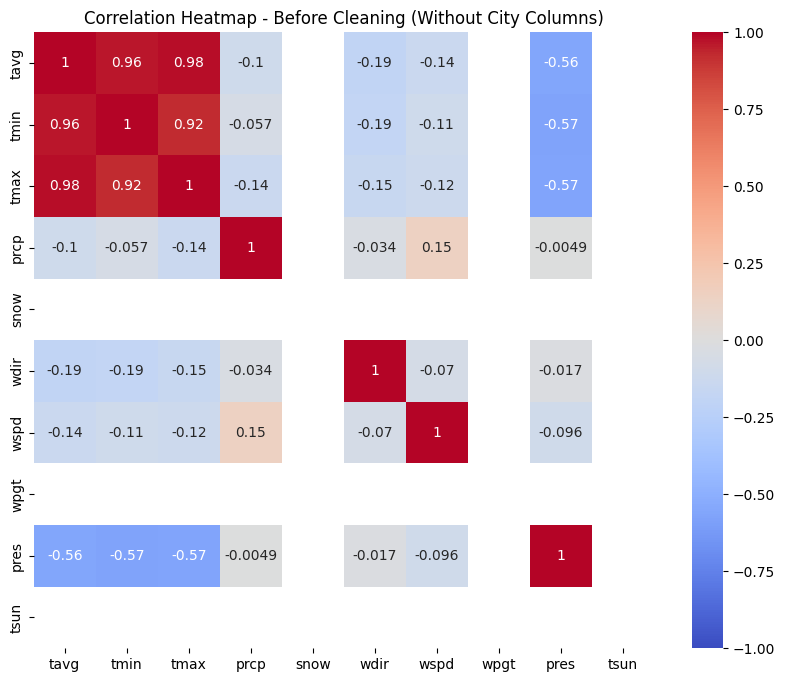

In [106]:
# Step 1: Drop the one-hot encoded 'city' columns temporarily for correlation matrix
# Assuming the one-hot encoded columns start with 'city_' or contain the city names
columns_to_drop = [col for col in combined_weather_data.columns if 'city' in col]
data_without_city = combined_weather_data.drop(columns=columns_to_drop)

# Step 2: Create the correlation matrix without the 'city' columns
correlation_matrix_before = data_without_city.corr()

# Step 3: Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix_before, annot=True, cmap="coolwarm", vmin=-1, vmax=1)
plt.title("Correlation Heatmap - Before Cleaning (Without City Columns)")
plt.show()

In [107]:
combined_weather_data.apply(pd.isnull).sum()

tavg       99
tmin       99
tmax       98
prcp     2122
snow    11326
wdir     1227
wspd      198
wpgt    11326
pres      416
tsun    11326
city        0
dtype: int64

In [108]:
null_pct = combined_weather_data.apply(pd.isnull).sum()/combined_weather_data.shape[0]
null_pct

tavg    0.008741
tmin    0.008741
tmax    0.008653
prcp    0.187357
snow    1.000000
wdir    0.108335
wspd    0.017482
wpgt    1.000000
pres    0.036730
tsun    1.000000
city    0.000000
dtype: float64

In [109]:
valid_columns = combined_weather_data.columns[null_pct < 0.5]
valid_columns

Index(['tavg', 'tmin', 'tmax', 'prcp', 'wdir', 'wspd', 'pres', 'city'], dtype='object')

In [110]:
combined_weather_data = combined_weather_data[valid_columns].copy()
combined_weather_data

,tavg,tmin,tmax,prcp,wdir,wspd,pres,city
date,,,,,,,,
1/1/2017,7.9,6.0,11.7,NaN,NaN,9.8,1029.7,New York
2/1/2017,4.9,4.4,5.6,NaN,33.0,20.3,1030.8,New York
3/1/2017,5.8,4.4,7.2,NaN,32.0,26.9,1029.9,New York
4/1/2017,7.1,2.2,11.7,NaN,263.0,19.5,1029.5,New York
5/1/2017,0.1,-2.2,1.7,NaN,264.0,21.7,1029.9,New York
...,...,...,...,...,...,...,...,...
2023-12-28,23.6,16.2,27.3,5.2,74.0,11.1,1010.0,Sydney
2023-12-29,22.4,20.0,26.1,0.0,78.0,12.6,1011.1,Sydney
2023-12-30,21.6,18.9,26.0,0.0,153.0,21.1,1010.7,Sydney


In [111]:
combined_weather_data['pres'] = combined_weather_data['pres'].fillna(combined_weather_data['pres'].mean())
combined_weather_data['tmax'] = combined_weather_data['tmax'].fillna(combined_weather_data['tmax'].mean())
combined_weather_data['prcp'] = combined_weather_data['prcp'].fillna(combined_weather_data['prcp'].mean())
combined_weather_data['wspd'] = combined_weather_data['wspd'].fillna(combined_weather_data['wspd'].mean())
combined_weather_data['wdir'] = combined_weather_data['wdir'].fillna(combined_weather_data['wdir'].mean())
combined_weather_data['tmin'] = combined_weather_data['tmin'].fillna(combined_weather_data['tmin'].mean())
combined_weather_data['tavg'] = combined_weather_data['tavg'].fillna(combined_weather_data['tavg'].mean())


combined_weather_data


,tavg,tmin,tmax,prcp,wdir,wspd,pres,city
date,,,,,,,,
1/1/2017,7.9,6.0,11.7,1.994926,191.929894,9.8,1029.7,New York
2/1/2017,4.9,4.4,5.6,1.994926,33.000000,20.3,1030.8,New York
3/1/2017,5.8,4.4,7.2,1.994926,32.000000,26.9,1029.9,New York
4/1/2017,7.1,2.2,11.7,1.994926,263.000000,19.5,1029.5,New York
5/1/2017,0.1,-2.2,1.7,1.994926,264.000000,21.7,1029.9,New York
...,...,...,...,...,...,...,...,...
2023-12-28,23.6,16.2,27.3,5.200000,74.000000,11.1,1010.0,Sydney
2023-12-29,22.4,20.0,26.1,0.000000,78.000000,12.6,1011.1,Sydney
2023-12-30,21.6,18.9,26.0,0.000000,153.000000,21.1,1010.7,Sydney


In [112]:
combined_weather_data.apply(pd.isnull).sum()

tavg    0
tmin    0
tmax    0
prcp    0
wdir    0
wspd    0
pres    0
city    0
dtype: int64

In [113]:

# Select only the numeric columns for calculating IQR
numeric_cols = combined_weather_data.select_dtypes(include=['float64', 'int64']).columns

# Calculate Q1 (25th percentile) and Q3 (75th percentile) for numeric columns
Q1 = combined_weather_data[numeric_cols].quantile(0.25)
Q3 = combined_weather_data[numeric_cols].quantile(0.75)
IQR = Q3 - Q1

# Define a filter to detect and remove outliers for numeric columns
outlier_filter = ~((combined_weather_data[numeric_cols] < (Q1 - 1.5 * IQR)) | (combined_weather_data[numeric_cols] > (Q3 + 1.5 * IQR)))

# Apply filter to remove rows with outliers in numeric columns
combined_weather_data_no_outliers = combined_weather_data[outlier_filter.all(axis=1)]

# Display to confirm outliers are removed
combined_weather_data_no_outliers.shape


(9963, 8)

In [114]:
# Creating a new feature: Temperature range
combined_weather_data_no_outliers['temp_range'] = combined_weather_data_no_outliers['tmax'] - combined_weather_data_no_outliers['tmin']

# Creating a new feature: Wind Chill (approximation)
combined_weather_data_no_outliers['wind_chill'] = combined_weather_data_no_outliers['tavg'] - (combined_weather_data_no_outliers['wspd'] * 0.7)


/var/folders/c1/n9yc0w657wl6vvqk3m2y5txh0000gn/T/ipykernel_7264/4098042057.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  combined_weather_data_no_outliers['temp_range'] = combined_weather_data_no_outliers['tmax'] - combined_weather_data_no_outliers['tmin']
/var/folders/c1/n9yc0w657wl6vvqk3m2y5txh0000gn/T/ipykernel_7264/4098042057.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  combined_weather_data_no_outliers['wind_chill'] = combined_weather_data_no_outliers['tavg'] - (combined_weather_data_no_ou

In [115]:
combined_weather_data_no_outliers.to_csv('NewCombined.csv', index="date")

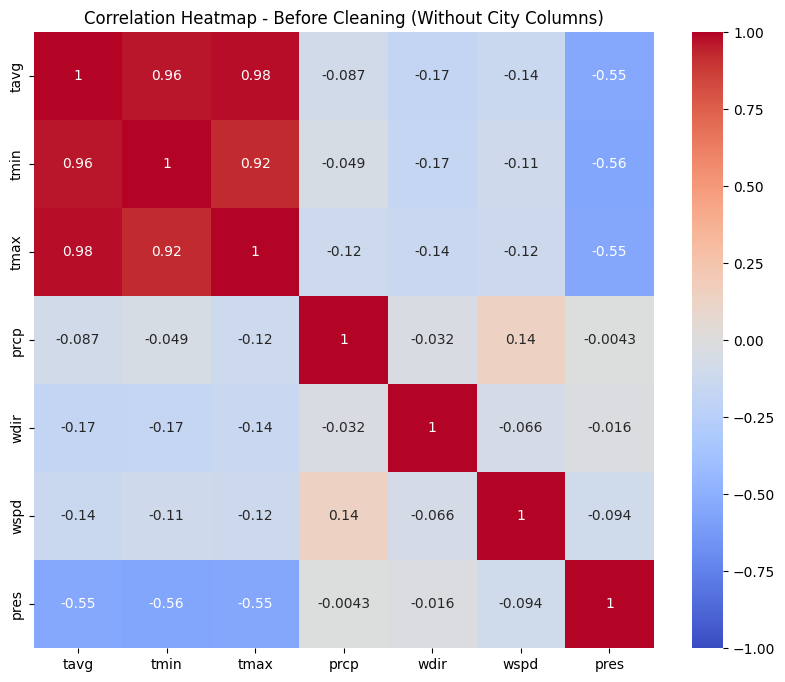

In [116]:
# Step 1: Drop the one-hot encoded 'city' columns temporarily for correlation matrix
# Assuming the one-hot encoded columns start with 'city_' or contain the city names
columns_to_drop = [col for col in combined_weather_data.columns if 'city' in col]
data_without_city = combined_weather_data.drop(columns=columns_to_drop)

# Step 2: Create the correlation matrix without the 'city' columns
correlation_matrix_before = data_without_city.corr()

# Step 3: Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix_before, annot=True, cmap="coolwarm", vmin=-1, vmax=1)
plt.title("Correlation Heatmap - Before Cleaning (Without City Columns)")
plt.show()


In [117]:
import numpy as np
from sklearn.model_selection import train_test_split

numeric_features = combined_weather_data_no_outliers.select_dtypes(include=[np.number])

combined_weather_data = pd.get_dummies(combined_weather_data, columns=['city'], drop_first=False)


# Select only numeric columns for training (replace 'target_column' with the actual column name you're predicting)
X = combined_weather_data.drop(columns=['tmax', 'tmin'])  # Features (input)
y = combined_weather_data[['tmax', 'tmin']]  # Target (output)

# Split the data: 80% for training, 20% for testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Print the shape of the train and test sets to verify the split
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

X_train shape: (9060, 9)
X_test shape: (2266, 9)
y_train shape: (9060, 2)
y_test shape: (2266, 2)


In [118]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

#  Initialize the Linear Regression model
linear_regression_model = LinearRegression()

# Train the model on the training data
linear_regression_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred_linear = linear_regression_model.predict(X_test)

# Calculate MSE for tmin and tmax
mse_linear_tmin = mean_squared_error(y_test['tmin'], y_pred_linear[:, 1])
mse_linear_tmax = mean_squared_error(y_test['tmax'], y_pred_linear[:, 0])

# Calculate R² score for tmin and tmax
r2_linear_tmin = r2_score(y_test['tmin'], y_pred_linear[:, 1])
r2_linear_tmax = r2_score(y_test['tmax'], y_pred_linear[:, 0])

# Print the results for Linear Regression
print(f"Linear Regression - MSE for tmin: {mse_linear_tmin}")
print(f"Linear Regression - MSE for tmax: {mse_linear_tmax}")
print(f"Linear Regression - R² for tmin: {r2_linear_tmin}")
print(f"Linear Regression - R² for tmax: {r2_linear_tmax}")


Linear Regression - MSE for tmin: 5.26503646987812
Linear Regression - MSE for tmax: 3.2255859972826624
Linear Regression - R² for tmin: 0.9331995007363779
Linear Regression - R² for tmax: 0.9649062771869298


In [119]:
# Initialize the Random Forest Regressor model
random_forest_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model on the training data
random_forest_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred_rf = random_forest_model.predict(X_test)

# Calculate MSE for tmin and tmax
mse_rf_tmin = mean_squared_error(y_test['tmin'], y_pred_rf[:, 1])
mse_rf_tmax = mean_squared_error(y_test['tmax'], y_pred_rf[:, 0])

# Calculate R² score for tmin and tmax
r2_rf_tmin = r2_score(y_test['tmin'], y_pred_rf[:, 1])
r2_rf_tmax = r2_score(y_test['tmax'], y_pred_rf[:, 0])

# Print the results for Random Forest
print(f"Random Forest - MSE for tmin: {mse_rf_tmin}")
print(f"Random Forest - MSE for tmax: {mse_rf_tmax}")
print(f"Random Forest - R² for tmin: {r2_rf_tmin}")
print(f"Random Forest - R² for tmax: {r2_rf_tmax}")


Random Forest - MSE for tmin: 3.6310450787662223
Random Forest - MSE for tmax: 2.665921135917748
Random Forest - R² for tmin: 0.9539308748385713
Random Forest - R² for tmax: 0.9709953176060976


In [120]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Separate the target variables for tmin and tmax
y_train_tmin = y_train['tmin']
y_train_tmax = y_train['tmax']
y_test_tmin = y_test['tmin']
y_test_tmax = y_test['tmax']

# Initialize Gradient Boosting Regressor models for tmin and tmax
gbr_model_tmin = GradientBoostingRegressor(n_estimators=100, random_state=42)
gbr_model_tmax = GradientBoostingRegressor(n_estimators=100, random_state=42)

# Train the models on the respective targets
gbr_model_tmin.fit(X_train, y_train_tmin)
gbr_model_tmax.fit(X_train, y_train_tmax)

# Make predictions on the test data
y_pred_tmin = gbr_model_tmin.predict(X_test)
y_pred_tmax = gbr_model_tmax.predict(X_test)

# Calculate MSE for tmin and tmax
mse_gbr_tmin = mean_squared_error(y_test_tmin, y_pred_tmin)
mse_gbr_tmax = mean_squared_error(y_test_tmax, y_pred_tmax)

# Calculate R² score for tmin and tmax
r2_gbr_tmin = r2_score(y_test_tmin, y_pred_tmin)
r2_gbr_tmax = r2_score(y_test_tmax, y_pred_tmax)

# Print the results for Gradient Boosting Regressor
print(f"Gradient Boosting Regressor - MSE for tmin: {mse_gbr_tmin}")
print(f"Gradient Boosting Regressor - MSE for tmax: {mse_gbr_tmax}")
print(f"Gradient Boosting Regressor - R² for tmin: {r2_gbr_tmin}")
print(f"Gradient Boosting Regressor - R² for tmax: {r2_gbr_tmax}")

# Save the Gradient Boosting Regressor models
import joblib
joblib.dump(gbr_model_tmin, 'gbr_model_tmin.pkl')
joblib.dump(gbr_model_tmax, 'gbr_model_tmax.pkl')
print("Gradient Boosting Regressor models saved successfully!")


Gradient Boosting Regressor - MSE for tmin: 3.557485063147101
Gradient Boosting Regressor - MSE for tmax: 2.6021526978226848
Gradient Boosting Regressor - R² for tmin: 0.9548641724134903
Gradient Boosting Regressor - R² for tmax: 0.97168910530626
Gradient Boosting Regressor models saved successfully!


In [121]:
from sklearn.linear_model import Lasso, Ridge
from sklearn.metrics import mean_squared_error, r2_score

# Separate the target variables for tmin and tmax
y_train_tmin = y_train['tmin']
y_train_tmax = y_train['tmax']
y_test_tmin = y_test['tmin']
y_test_tmax = y_test['tmax']

# Initialize Lasso and Ridge models for tmin and tmax
lasso_model_tmin = Lasso(alpha=1.0, random_state=42)
lasso_model_tmax = Lasso(alpha=1.0, random_state=42)

ridge_model_tmin = Ridge(alpha=1.0, random_state=42)
ridge_model_tmax = Ridge(alpha=1.0, random_state=42)

# ---- Lasso Regression ----
# Train the Lasso models on the respective targets
lasso_model_tmin.fit(X_train, y_train_tmin)
lasso_model_tmax.fit(X_train, y_train_tmax)

# Make predictions on the test data
y_pred_lasso_tmin = lasso_model_tmin.predict(X_test)
y_pred_lasso_tmax = lasso_model_tmax.predict(X_test)

# Calculate MSE and R² for Lasso Regression
mse_lasso_tmin = mean_squared_error(y_test_tmin, y_pred_lasso_tmin)
mse_lasso_tmax = mean_squared_error(y_test_tmax, y_pred_lasso_tmax)

r2_lasso_tmin = r2_score(y_test_tmin, y_pred_lasso_tmin)
r2_lasso_tmax = r2_score(y_test_tmax, y_pred_lasso_tmax)

print(f"Lasso Regression - MSE for tmin: {mse_lasso_tmin}")
print(f"Lasso Regression - MSE for tmax: {mse_lasso_tmax}")
print(f"Lasso Regression - R² for tmin: {r2_lasso_tmin}")
print(f"Lasso Regression - R² for tmax: {r2_lasso_tmax}")

Lasso Regression - MSE for tmin: 5.926471352210247
Lasso Regression - MSE for tmax: 3.816245349765816
Lasso Regression - R² for tmin: 0.9248075018161531
Lasso Regression - R² for tmax: 0.9584800229774766


In [122]:
# ---- Ridge Regression ----
# Train the Ridge models on the respective targets
ridge_model_tmin.fit(X_train, y_train_tmin)
ridge_model_tmax.fit(X_train, y_train_tmax)

# Make predictions on the test data
y_pred_ridge_tmin = ridge_model_tmin.predict(X_test)
y_pred_ridge_tmax = ridge_model_tmax.predict(X_test)

# Calculate MSE and R² for Ridge Regression
mse_ridge_tmin = mean_squared_error(y_test_tmin, y_pred_ridge_tmin)
mse_ridge_tmax = mean_squared_error(y_test_tmax, y_pred_ridge_tmax)

r2_ridge_tmin = r2_score(y_test_tmin, y_pred_ridge_tmin)
r2_ridge_tmax = r2_score(y_test_tmax, y_pred_ridge_tmax)

print(f"Ridge Regression - MSE for tmin: {mse_ridge_tmin}")
print(f"Ridge Regression - MSE for tmax: {mse_ridge_tmax}")
print(f"Ridge Regression - R² for tmin: {r2_ridge_tmin}")
print(f"Ridge Regression - R² for tmax: {r2_ridge_tmax}")

Ridge Regression - MSE for tmin: 5.26506892370747
Ridge Regression - MSE for tmax: 3.225543780155115
Ridge Regression - R² for tmin: 0.9331990889762665
Ridge Regression - R² for tmax: 0.9649067365007331


In [123]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

# Step 1: Define the classification function for weather types
def classify_weather(row):
    if row['prcp'] > 0.1:
        return 'Rainy'
    elif row['wspd'] > 15:  # Example threshold for windy day
        return 'Windy'
    else:
        return 'Sunny'

# Step 2: Apply the function to create a new 'weather_type' column
combined_weather_data_no_outliers.loc[:, 'weather_type'] = combined_weather_data_no_outliers.apply(classify_weather, axis=1)

# Step 3: Drop any non-numeric columns, except for 'weather_type' (target)
# One-hot encode the 'city' column if it still exists as a string
X_classification = pd.get_dummies(combined_weather_data_no_outliers.drop(columns=['weather_type']), drop_first=True)

# Step 4: The target column (weather_type)
y_classification = combined_weather_data_no_outliers['weather_type']

# Step 5: Split the data: 80% for training, 20% for testing
X_train_class, X_test_class, y_train_class, y_test_class = train_test_split(X_classification, y_classification, test_size=0.2, random_state=42)

# Step 6: Initialize and train the Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train_class, y_train_class)

# Step 7: Predict on the test data
y_pred_class = rf_classifier.predict(X_test_class)

# Step 8: Evaluate the model
print(f"Accuracy: {accuracy_score(y_test_class, y_pred_class)}")
print(classification_report(y_test_class, y_pred_class))

# Step 9: Save the DataFrame including the 'weather_type' column to a new CSV file
combined_weather_data_no_outliers.to_csv('NewCombined.csv', index=True)

print("CSV file with 'weather_type' column saved successfully.")


/var/folders/c1/n9yc0w657wl6vvqk3m2y5txh0000gn/T/ipykernel_7264/2355813738.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  combined_weather_data_no_outliers.loc[:, 'weather_type'] = combined_weather_data_no_outliers.apply(classify_weather, axis=1)


Accuracy: 1.0
              precision    recall  f1-score   support

       Rainy       1.00      1.00      1.00       809
       Sunny       1.00      1.00      1.00       630
       Windy       1.00      1.00      1.00       554

    accuracy                           1.00      1993
   macro avg       1.00      1.00      1.00      1993
weighted avg       1.00      1.00      1.00      1993

CSV file with 'weather_type' column saved successfully.


In [124]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

def simulate_energy_usage(row):
    tavg = row['tavg']
    wspd = row['wspd']
    prcp = row['prcp']
    
    # Logic: higher energy consumption on very cold or very hot days
    if tavg < 10:  # Very cold (more heating needed)
        return 100 + (10 - tavg) * 5 + wspd * 2
    elif tavg > 25:  # Very hot (more cooling needed)
        return 100 + (tavg - 25) * 4 + wspd * 1.5
    else:
        return 50 + prcp * 0.5  # Moderate temperature = moderate energy usage

# Apply the function to create a new column 'energy_usage'
combined_weather_data_no_outliers.loc[:, 'energy_usage'] = combined_weather_data_no_outliers.apply(simulate_energy_usage, axis=1)
# weather_data['energy_usage'] = weather_data.apply(simulate_energy_usage, axis=1)

# Step 3: Define features (X) and target (y)
X = combined_weather_data_no_outliers[['tavg', 'tmin', 'tmax', 'prcp', 'wspd']]  # Features
y = combined_weather_data_no_outliers['energy_usage']  # Target (energy usage)

# Step 4: Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 5: Initialize and train the Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Step 6: Make predictions on the test set
y_pred = rf_model.predict(X_test)

# Step 7: Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse}")
print(f"R² Score: {r2}")
combined_weather_data_no_outliers
# Check if 'energy_usage' column exists and print first few rows
# print(weather_data.head())  # This will show if the column 'energy_usage' is added

# Step 8: Save the model for later use
import joblib
joblib.dump(rf_model, 'energy_usage_rf_model.pkl')
print("Random Forest Regressor model saved successfully!")


combined_weather_data_no_outliers

# Create a DataFrame to show Actual vs Predicted energy consumption
energy_results_rf = pd.DataFrame({
    'Actual Energy Consumption': y_test.values,
    'Predicted Energy Consumption (RF)': y_pred
})

# Display the first few rows of the comparison table
print(energy_results_rf.head())


/var/folders/c1/n9yc0w657wl6vvqk3m2y5txh0000gn/T/ipykernel_7264/2283334066.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  combined_weather_data_no_outliers.loc[:, 'energy_usage'] = combined_weather_data_no_outliers.apply(simulate_energy_usage, axis=1)


Mean Squared Error (MSE): 0.3802584950966159
R² Score: 0.9998339895524181
Random Forest Regressor model saved successfully!
   Actual Energy Consumption  Predicted Energy Consumption (RF)
0                  50.997463                          50.997463
1                 123.000000                         123.227500
2                 127.348477                         127.545781
3                 158.600000                         159.193000
4                 133.800000                         134.540500


In [125]:
import joblib


# Save the Random Forest Regressor model
joblib.dump(random_forest_model, 'random_forest_regressor_model.pkl')
print("Random Forest Regressor model saved successfully!")

# Save the Random Forest Classifier model
joblib.dump(rf_classifier, 'random_forest_classifier_model.pkl')
print("Random Forest Classifier model saved successfully!")


Random Forest Regressor model saved successfully!
Random Forest Classifier model saved successfully!


In [126]:
combined_weather_data_no_outliers

,tavg,tmin,tmax,prcp,wdir,wspd,pres,city,temp_range,wind_chill,weather_type,energy_usage
date,,,,,,,,,,,,
1/1/2017,7.9,6.0,11.7,1.994926,191.929894,9.8,1029.7,New York,5.7,1.04,Rainy,130.10
2/1/2017,4.9,4.4,5.6,1.994926,33.000000,20.3,1030.8,New York,1.2,-9.31,Rainy,166.10
3/1/2017,5.8,4.4,7.2,1.994926,32.000000,26.9,1029.9,New York,2.8,-13.03,Rainy,174.80
4/1/2017,7.1,2.2,11.7,1.994926,263.000000,19.5,1029.5,New York,9.5,-6.55,Rainy,153.50
5/1/2017,0.1,-2.2,1.7,1.994926,264.000000,21.7,1029.9,New York,3.9,-15.09,Rainy,192.90
...,...,...,...,...,...,...,...,...,...,...,...,...
2023-12-27,20.6,19.8,26.3,0.000000,154.000000,17.7,1008.6,Sydney,6.5,8.21,Windy,50.00
2023-12-29,22.4,20.0,26.1,0.000000,78.000000,12.6,1011.1,Sydney,6.1,13.58,Sunny,50.00
2023-12-30,21.6,18.9,26.0,0.000000,153.000000,21.1,1010.7,Sydney,7.1,6.83,Windy,50.00


In [127]:
# Load the new datasets
tokyo_weather = pd.read_csv('Tokyo.csv', index_col="date")
bombay_weather = pd.read_csv('Bombay.csv', index_col="date")

# Add the 'city' column to each dataset
tokyo_weather['city'] = 'Tokyo'
bombay_weather['city'] = 'London'

# Merge the new datasets with the existing one
additional_datasets = pd.concat([tokyo_weather, bombay_weather])

# Continue with the same data cleaning and processing as you did earlier
additional_datasets = pd.get_dummies(additional_datasets, columns=['city'], drop_first=False)

# Now, you can use this enhanced dataset to retrain your models
null_pct = tokyo_weather.apply(pd.isnull).sum()/tokyo_weather.shape[0]


null_pct


tavg    0.0
tmin    0.0
tmax    0.0
prcp    0.0
wdir    0.0
wspd    0.0
pres    0.0
city    0.0
dtype: float64

In [128]:
null_pct1 = bombay_weather.apply(pd.isnull).sum()/bombay_weather.shape[0]
null_pct

tavg    0.0
tmin    0.0
tmax    0.0
prcp    0.0
wdir    0.0
wspd    0.0
pres    0.0
city    0.0
dtype: float64

In [129]:
import numpy as np
from sklearn.model_selection import train_test_split

numeric_features = additional_datasets.select_dtypes(include=[np.number])



# Select only numeric columns for training (replace 'target_column' with the actual column name you're predicting)
X = numeric_features.drop(columns=['tmax', 'tmin'])  # Features (input)
y = numeric_features[['tmax', 'tmin']]  # Target (output)

# Split the data: 80% for training, 20% for testing
X_train1, X_test1, y_train1, y_test1 = train_test_split(X, y, test_size=0.2, random_state=42)

# Print the shape of the train and test sets to verify the split
print(f"X_train shape: {X_train1.shape}")
print(f"X_test shape: {X_test1.shape}")
print(f"y_train shape: {y_train1.shape}")
print(f"y_test shape: {y_test1.shape}")


X_train shape: (3878, 5)
X_test shape: (970, 5)
y_train shape: (3878, 2)
y_test shape: (970, 2)


In [130]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
import numpy as np

imputer = SimpleImputer(strategy='mean')

# Impute missing values in X_train1 and X_test1
X_train1_imputed = imputer.fit_transform(X_train1)
X_test1_imputed = imputer.transform(X_test1)

#  Initialize the Linear Regression model
linear_regression_model = LinearRegression()

# Train the Linear Regression model on the imputed training data
linear_regression_model.fit(X_train1_imputed, y_train1)

# Make predictions on the imputed test data
y_pred_linear = linear_regression_model.predict(X_test1_imputed)

# Calculate MSE for tmin and tmax
mse_linear_tmin = mean_squared_error(y_test1['tmin'], y_pred_linear[:, 1])
mse_linear_tmax = mean_squared_error(y_test1['tmax'], y_pred_linear[:, 0])

# Calculate R² score for tmin and tmax
r2_linear_tmin = r2_score(y_test1['tmin'], y_pred_linear[:, 1])
r2_linear_tmax = r2_score(y_test1['tmax'], y_pred_linear[:, 0])

# Print the results for Linear Regression
print(f"Linear Regression - MSE for tmin: {mse_linear_tmin}")
print(f"Linear Regression - MSE for tmax: {mse_linear_tmax}")
print(f"Linear Regression - R² for tmin: {r2_linear_tmin}")
print(f"Linear Regression - R² for tmax: {r2_linear_tmax}")

Linear Regression - MSE for tmin: 4.478788407551189
Linear Regression - MSE for tmax: 2.031854686620117
Linear Regression - R² for tmin: 0.9506283967771929
Linear Regression - R² for tmax: 0.9731303097989533


In [131]:
random_forest_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the Random Forest model on the imputed training data
random_forest_model.fit(X_train1_imputed, y_train1)

# Make predictions on the imputed test data with Random Forest
y_pred_rf = random_forest_model.predict(X_test1_imputed)

# Calculate MSE for tmin and tmax for Random Forest
mse_rf_tmin = mean_squared_error(y_test1['tmin'], y_pred_rf[:, 1])
mse_rf_tmax = mean_squared_error(y_test1['tmax'], y_pred_rf[:, 0])

# Calculate R² score for tmin and tmax for Random Forest
r2_rf_tmin = r2_score(y_test1['tmin'], y_pred_rf[:, 1])
r2_rf_tmax = r2_score(y_test1['tmax'], y_pred_rf[:, 0])

# Print the results for Random Forest Regressor
print(f"Random Forest - MSE for tmin: {mse_rf_tmin}")
print(f"Random Forest - MSE for tmax: {mse_rf_tmax}")
print(f"Random Forest - R² for tmin: {r2_rf_tmin}")
print(f"Random Forest - R² for tmax: {r2_rf_tmax}")



Random Forest - MSE for tmin: 3.297855350515464
Random Forest - MSE for tmax: 1.6296206327933862
Random Forest - R² for tmin: 0.9636463277485162
Random Forest - R² for tmax: 0.9784495407881604


In [132]:
# Save the models for future use
import joblib
joblib.dump(linear_regression_model, 'linear_regression_model_enhanced.pkl')
joblib.dump(random_forest_model, 'random_forest_model_enhanced.pkl')

print("Models saved successfully!")

Models saved successfully!


In [133]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
import joblib

# Assuming the data is already loaded, cleaned, and preprocessed
# Shift 'tmin' and 'tmax' to represent the next day's values
combined_weather_data_no_outliers['tmin_next_day'] = combined_weather_data_no_outliers['tmin'].shift(-1)
combined_weather_data_no_outliers['tmax_next_day'] = combined_weather_data_no_outliers['tmax'].shift(-1)

# Drop the last row since it will have NaN values for shifted columns
combined_weather_data_no_outliers = combined_weather_data_no_outliers.dropna(subset=['tmin_next_day', 'tmax_next_day'])

# Define features (X) and the shifted targets (y)
X = combined_weather_data_no_outliers[['tavg', 'prcp', 'wdir', 'wspd', 'pres']]  # Today's features
y = combined_weather_data_no_outliers[['tmin_next_day', 'tmax_next_day']]  # Tomorrow's tmin and tmax

# Split the data: 80% for training, 20% for testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Separate the target variables for tmin and tmax
y_train_tmin = y_train['tmin_next_day']
y_train_tmax = y_train['tmax_next_day']
y_test_tmin = y_test['tmin_next_day']
y_test_tmax = y_test['tmax_next_day']

# Initialize and train the models
random_forest_model = RandomForestRegressor(n_estimators=100, random_state=42)
linear_regression_model = LinearRegression()

gbr_model_tmin = GradientBoostingRegressor(n_estimators=100, random_state=42)
gbr_model_tmax = GradientBoostingRegressor(n_estimators=100, random_state=42)

# Train the models on the training data
random_forest_model.fit(X_train, y_train)
linear_regression_model.fit(X_train, y_train)

# Train Gradient Boosting models for tmin and tmax separately
gbr_model_tmin.fit(X_train, y_train_tmin)
gbr_model_tmax.fit(X_train, y_train_tmax)

# Make predictions using the test data
y_pred_rf = random_forest_model.predict(X_test)
y_pred_linear = linear_regression_model.predict(X_test)

# Make predictions with Gradient Boosting Regressor
y_pred_tmin_gbr = gbr_model_tmin.predict(X_test)
y_pred_tmax_gbr = gbr_model_tmax.predict(X_test)

# Create a DataFrame to show Actual vs Predicted for tmin and tmax
results = pd.DataFrame({
    'Actual Tmin': y_test['tmin_next_day'].values,
    'Predicted Tmin (RF)': y_pred_rf[:, 0],
    'Predicted Tmin (Linear)': y_pred_linear[:, 0],
    'Predicted Tmin (GBR)': y_pred_tmin_gbr,
    'Actual Tmax': y_test['tmax_next_day'].values,
    'Predicted Tmax (RF)': y_pred_rf[:, 1],
    'Predicted Tmax (Linear)': y_pred_linear[:, 1],
    'Predicted Tmax (GBR)': y_pred_tmax_gbr
})

# Display the results
print(results.head())

# Optionally, save the table to a CSV file for further analysis
# results.to_csv('actual_vs_predicted_temperatures_with_gbr.csv', index=False)

# # Save the Gradient Boosting Regressor models
# joblib.dump(gbr_model_tmin, 'gbr_model_tmin.pkl')
# joblib.dump(gbr_model_tmax, 'gbr_model_tmax.pkl')
# print("Gradient Boosting Regressor models saved successfully!")


/var/folders/c1/n9yc0w657wl6vvqk3m2y5txh0000gn/T/ipykernel_7264/1006711592.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  combined_weather_data_no_outliers['tmin_next_day'] = combined_weather_data_no_outliers['tmin'].shift(-1)
/var/folders/c1/n9yc0w657wl6vvqk3m2y5txh0000gn/T/ipykernel_7264/1006711592.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  combined_weather_data_no_outliers['tmax_next_day'] = combined_weather_data_no_outliers['tmax'].shift(-1)


   Actual Tmin  Predicted Tmin (RF)  Predicted Tmin (Linear)  \
0          4.3                5.224                 5.150803   
1          5.6                7.259                 6.742418   
2         15.3               15.166                14.354032   
3         -1.1                1.400                -0.684800   
4          9.4                8.732                 8.354473   

   Predicted Tmin (GBR)  Actual Tmax  Predicted Tmax (RF)  \
0              4.651725         16.8               14.649   
1              7.061696         20.4               16.527   
2             14.662721         23.2               24.636   
3              0.712909          6.1                8.586   
4              7.932268         20.6               16.851   

   Predicted Tmax (Linear)  Predicted Tmax (GBR)  
0                14.827111             14.825867  
1                16.900502             16.892898  
2                24.203531             25.733383  
3                 7.810352              7.41

In [134]:

# Print the columns in X_train and X_test to compare
print("Columns in X_train:\n", X_train.columns)
print("Columns in X_test:\n", X_test.columns)

# Ensure X_test has all columns from X_train, adding missing columns
missing_cols = set(X_train.columns) - set(X_test.columns)
print(f"Missing columns in X_test: {missing_cols}")

for col in missing_cols:
    X_test[col] = 0  # Add missing columns to the test set and fill them with 0

# Remove extra columns in X_test that were not present in X_train
extra_cols = set(X_test.columns) - set(X_train.columns)
print(f"Extra columns in X_test: {extra_cols}")

X_test = X_test.drop(columns=extra_cols)

# Ensure the column order matches X_train
X_test = X_test[X_train.columns]

# Now proceed with the predictions
y_pred_tmin_gbr = gbr_model_tmin.predict(X_test)
y_pred_tmax_gbr = gbr_model_tmax.predict(X_test)

# Create a DataFrame for actual vs predicted values
results = pd.DataFrame({
    'Actual Tmin': y_test['tmin_next_day'].values,
    'Predicted Tmin (GBR)': y_pred_tmin_gbr,
    'Actual Tmax': y_test['tmax_next_day'].values,
    'Predicted Tmax (GBR)': y_pred_tmax_gbr
})

# Display the results
print(results.head())


Columns in X_train:
 Index(['tavg', 'prcp', 'wdir', 'wspd', 'pres'], dtype='object')
Columns in X_test:
 Index(['tavg', 'prcp', 'wdir', 'wspd', 'pres'], dtype='object')
Missing columns in X_test: set()
Extra columns in X_test: set()
   Actual Tmin  Predicted Tmin (GBR)  Actual Tmax  Predicted Tmax (GBR)
0          4.3              4.651725         16.8             14.825867
1          5.6              7.061696         20.4             16.892898
2         15.3             14.662721         23.2             25.733383
3         -1.1              0.712909          6.1              7.412790
4          9.4              7.932268         20.6             18.109910


In [135]:
combined_weather_data_no_outliers

,tavg,tmin,tmax,prcp,wdir,wspd,pres,city,temp_range,wind_chill,weather_type,energy_usage,tmin_next_day,tmax_next_day
date,,,,,,,,,,,,,,
1/1/2017,7.9,6.0,11.7,1.994926,191.929894,9.8,1029.7,New York,5.7,1.04,Rainy,130.1,4.4,5.6
2/1/2017,4.9,4.4,5.6,1.994926,33.000000,20.3,1030.8,New York,1.2,-9.31,Rainy,166.1,4.4,7.2
3/1/2017,5.8,4.4,7.2,1.994926,32.000000,26.9,1029.9,New York,2.8,-13.03,Rainy,174.8,2.2,11.7
4/1/2017,7.1,2.2,11.7,1.994926,263.000000,19.5,1029.5,New York,9.5,-6.55,Rainy,153.5,-2.2,1.7
5/1/2017,0.1,-2.2,1.7,1.994926,264.000000,21.7,1029.9,New York,3.9,-15.09,Rainy,192.9,-1.7,2.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-12-26,23.5,20.4,27.5,1.400000,126.000000,19.1,1006.6,Sydney,7.1,10.13,Rainy,50.7,19.8,26.3
2023-12-27,20.6,19.8,26.3,0.000000,154.000000,17.7,1008.6,Sydney,6.5,8.21,Windy,50.0,20.0,26.1
2023-12-29,22.4,20.0,26.1,0.000000,78.000000,12.6,1011.1,Sydney,6.1,13.58,Sunny,50.0,18.9,26.0


                   tavg      tmin      tmax      prcp      wdir      wspd  \
tavg           1.000000  0.962044  0.978437 -0.163723 -0.190900 -0.098476   
tmin           0.962044  1.000000  0.922640 -0.102468 -0.189972 -0.084043   
tmax           0.978437  0.922640  1.000000 -0.204207 -0.161926 -0.075477   
prcp          -0.163723 -0.102468 -0.204207  1.000000  0.006838 -0.120120   
wdir          -0.190900 -0.189972 -0.161926  0.006838  1.000000 -0.061170   
wspd          -0.098476 -0.084043 -0.075477 -0.120120 -0.061170  1.000000   
pres          -0.586564 -0.596539 -0.589737  0.064857  0.001054 -0.098039   
temp_range     0.194930 -0.041938  0.346630 -0.279811  0.042550  0.008872   
wind_chill     0.920654  0.881514  0.892613 -0.097286 -0.144382 -0.479145   
energy_usage   0.303731  0.322208  0.283758  0.058563 -0.073855 -0.178171   
tmin_next_day  0.966987  0.954406  0.924024 -0.121409 -0.209662 -0.122388   
tmax_next_day  0.926432  0.885491  0.911024 -0.187734 -0.182091 -0.115524   

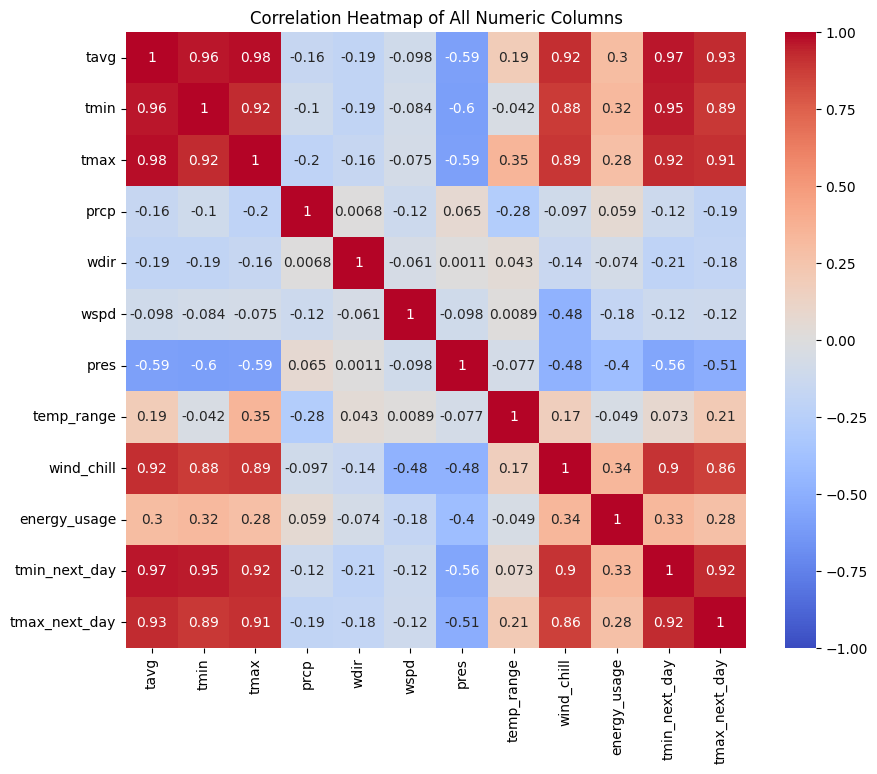

In [136]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming your DataFrame is named 'combined_weather_data_no_outliers'

# Drop non-numeric columns
numeric_data = combined_weather_data_no_outliers.select_dtypes(include=[float, int])

# Compute the correlation matrix on numeric data
correlation_matrix = numeric_data.corr()

# Display the correlation matrix
print(correlation_matrix)

# Plot the heatmap of the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", vmin=-1, vmax=1)
plt.title("Correlation Heatmap of All Numeric Columns")
plt.show()
